In [ ]:
#reference:III_teacher-https://github.com/Elwing-Chou、https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda
'''
ClassificationTree
每次選擇特徵將資料分割
特徵規範(criterion)可使用1.Gini不純度2.熵
亂度:不確定性，若不確定性高代表可能性太多，對於預測來說只能算是隨便猜，所以選擇特徵時候要盡量在切割後讓整個系統的不確定性降低

Entorpy:衡量亂度的方式
E(某種可能) = log(某種可能的機率) 
G(分類後系統的亂度降低效益) = E1(原本亂度)-E2(後來的亂度)
ID3決策樹缺點:傾向選擇特徵屬性最多的來劃分，例如學號但會產生多個子樹
C4.5決策數:引入逞罰項目，把廣度均勻度納入考量，避免太多子節點，但每個節點只有少量資料
CART(Classification And Regression Tree)決策樹
scikit-learn使用的決策樹，每次只劃分出兩個子節點
非常適合使用在回歸問題上
'''

In [1]:
#使用sklearn內建玩具資料
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

#Seaborn 套件是以 matplotlib 為基礎建構的高階繪圖套件
import seaborn as sns
%matplotlib inline

In [2]:
#鳶尾花分類問題

iris = load_iris()
df = pd.DataFrame(data = iris['data'], columns= iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


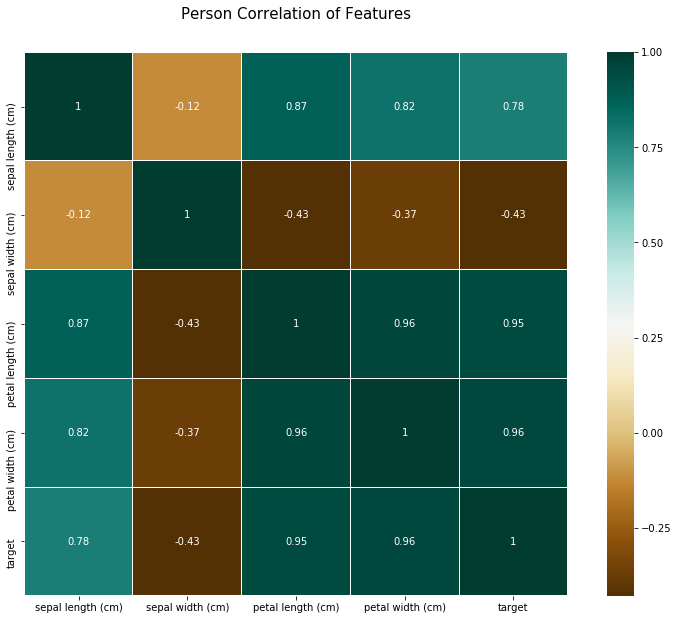

In [3]:
#相關係數:兩東西的相關姓，介於 1 至 -1
#正相關(一起上升):1
#負相關(一個上升，另一個總是下降):-1

plt.figure(figsize=(14,10))
plt.title('Person Correlation of Features', y= 1.05, size= 15)

sns.heatmap(df.astype(float).corr(), cmap = "BrBG", linewidths=0.1,square=True, linecolor='White',annot=True )
#先以相關係數觀察，target與petal呈現正相關，理論上會以花瓣為分類基礎

In [4]:
#分割資料:一份測試，一分訓練
#把資料分成兩個部分，train_test_split是交叉驗證函数，功能是從样本中随機的照比例選取train_data和test_data
'''
參數
train_data：所要劃分的樣本特徵集
train_target：所要劃分的樣本结果
test_size：樣本占比，如果是整數代表樣本的數量
random_state：填0或不填每次都隨機數組都不一樣，1或其他數字一樣。
'''
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(iris['data'], iris['target'],test_size=0.2)


In [5]:
#訓練模型

from sklearn.tree import DecisionTreeClassifier

#max_depth:決策樹最大深度
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)

#clf.fit(輸入資料,正確答案)
clf = clf.fit(data_train, target_train)



In [6]:
#準確度
clf.score(data_test,target_test)

0.9666666666666667

In [7]:
'''failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH
pip install 後執行找不到路徑
官網下載graphviz-2.38.msi
安裝
再設定路徑'''

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

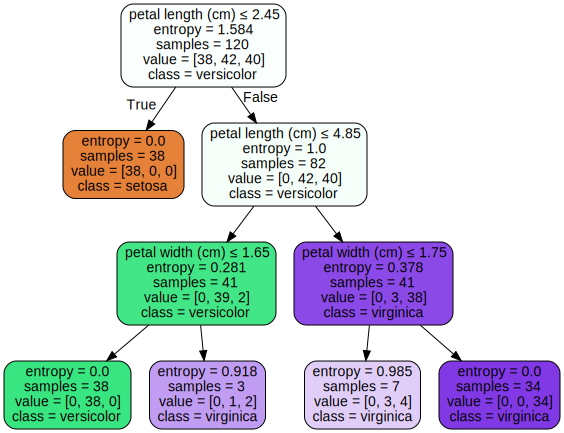

In [8]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names= iris.feature_names, class_names=iris.target_names, 
                           filled=True, rounded=True, special_characters=True)
gragh = graphviz.Source(dot_data)
gragh

In [9]:
#預測正確率
from sklearn.metrics import accuracy_score

#fit完測試資料後用.predict來預測test資料集
predict = clf.predict(data_test)
print("預測",predict)
print("正確標籤", target_test)
print("正確率:", accuracy_score(target_test, predict) * 100,"%")

預測 [0 1 2 0 2 2 2 0 0 2 2 0 1 0 1 1 0 2 0 2 1 0 2 0 0 1 2 1 0 2]
正確標籤 [0 1 2 0 2 2 2 0 0 2 2 0 1 0 1 1 0 2 0 2 1 0 2 0 0 1 2 1 0 1]
正確率: 96.66666666666667 %


In [10]:
#確認分類錯誤，列是正確標籤，行是預測標籤
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,12,0,0
1,0,7,1
2,0,0,10


In [11]:
#特徵重要權重
clf.feature_importances_

array([0.        , 0.        , 0.90376391, 0.09623609])

標籤代號 [0, 1, 2] 標籤名稱 ['setosa', 'versicolor', 'virginica']


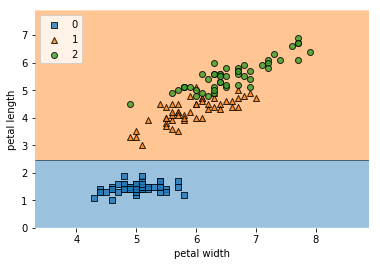

In [12]:
#試看看決策樹第一層決策邊界
import numpy as np
from mlxtend.plotting import plot_decision_regions
#深度設定為一
clf = DecisionTreeClassifier(criterion='entropy',max_depth=1)
clf = clf.fit(df[['sepal length (cm)','petal length (cm)']].values, np.array(df['target']))


print('標籤代號',list(set(iris['target'])),'標籤名稱',iris['target_names'].tolist())

#畫決策邊界
plot_decision_regions(df[['sepal length (cm)','petal length (cm)']].values,np.array(df['target']), clf=clf)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left', markerscale=1,fontsize=10)
#graphviz圖看到第一次分割以petal length (cm) ≤ 2.45為主